# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### Import the necessary libraries.

In [91]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [92]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

### First look at its main features (head, shape, info).

In [93]:
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [94]:
data.shape

(9134, 24)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Standardize column names

In [96]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

### Check the Null values

In [97]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

percentage
customer                              0.0
state                                 0.0
vehicle_class                         0.0
total_claim_amount                    0.0
sales_channel                         0.0
renew_offer_type                      0.0
policy                                0.0
policy_type                           0.0
number_of_policies                    0.0
number_of_open_complaints             0.0
months_since_policy_inception         0.0
months_since_last_claim               0.0
monthly_premium_auto                  0.0
marital_status                        0.0
location_code                         0.0
income                                0.0
gender                                0.0
employmentstatus                      0.0
effective_to_date                     0.0
education                             0.0
coverage                              0.0
response                              0.0
customer_lifetime_value               0.0
vehicle_size                          0.0

### first check the distribution of the categorical values

In [98]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

FI61059    1
VE72838    1
ZO31878    1
YC77374    1
KN65809    1
          ..
EW68125    1
PD94315    1
GD56260    1
MB20764    1
VS73599    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
1/28/11    169
2/26/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/28/11    161
2/10/11    161
1/29/11    160
1/21/11    160
1/2/11     160
2/5/11     158
2/22/11    158
2/3/11     158
2/7/11     157


### grouping the categorical values, when there are values with only a few counts

In [99]:
data['state'] = data['state'].apply(lambda x: x if x in ['California', 'Oregon', 'Arizona'] else 'Other')
data['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Other         1680
Name: state, dtype: int64

In [100]:
data['education'] = data['education'].apply(lambda x: x if x in ['Bachelor', 'College', 'High School or Below'] else 'Higher')
data['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Higher                  1083
Name: education, dtype: int64

In [101]:
data['policy'] = data['policy'].apply(lambda x: x if x in ['Corporate L1', 'Personal L1', 'Personal L2', 'Personal L3'] else 'Other')

data['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Other           1987
Personal L1     1240
Corporate L1     359
Name: policy, dtype: int64

In [102]:
data['vehicle_class'] = data['vehicle_class'].apply(lambda x: x if x in ['Four-Door Car', 'Two-Door Car', 'SUV'] else 'Other')

data['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Other             831
Name: vehicle_class, dtype: int64

### remove the numerical outliers

In [103]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):

    for column in in_columns:

        if column not in skip_columns:

            upper = np.percentile(data[column],75)

            lower = np.percentile(data[column],25)

            iqr = upper - lower

            upper_limit = upper + (threshold * iqr)

            lower_limit = lower - (threshold * iqr)

            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]

    return data

### 2. Create a copy of the dataframe for the data wrangling.

In [104]:
df = data

In [105]:
df.shape

(9134, 24)

### 3. Normalize the continuous variables. You can use any one method you want.

In [106]:
transformer = Normalizer().fit(df.select_dtypes(np.number))
x_normalized = transformer.transform(df.select_dtypes(np.number))
x_normalized

array([[4.90479814e-02, 9.98772156e-01, 1.22463800e-03, ...,
        0.00000000e+00, 1.77483768e-05, 6.82977323e-03],
       [9.87006407e-01, 0.00000000e+00, 1.32929472e-02, ...,
        0.00000000e+00, 1.13131466e-03, 1.60005358e-01],
       [2.55477793e-01, 9.66746974e-01, 2.14096978e-03, ...,
        0.00000000e+00, 3.96475885e-05, 1.12296293e-02],
       ...,
       [9.95277200e-01, 0.00000000e+00, 1.03625303e-02, ...,
        3.65736364e-04, 2.43824242e-04, 9.64062747e-02],
       [3.24247237e-01, 9.45493129e-01, 4.13688256e-03, ...,
        0.00000000e+00, 1.29277580e-04, 2.97855545e-02],
       [9.89138089e-01, 0.00000000e+00, 2.91609456e-02, ...,
        0.00000000e+00, 3.78713580e-04, 1.39972539e-01]])

### 4. Encode the categorical variables

In [107]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(df)
encoded = encoder.transform(df).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [61]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(df.select_dtypes('object'))
encoded = encoder.transform(df.select_dtypes('object')).toarray()
encoded

array([], shape=(9134, 0), dtype=float64)

### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [109]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date'] = data['effective_to_date'].dt.strftime('%d')

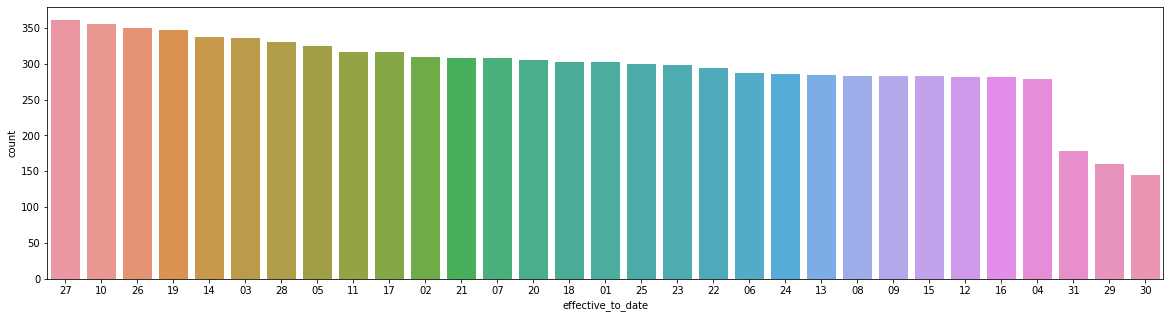

In [110]:
plt.figure(figsize = (20, 5))
sns.countplot(data['effective_to_date'], order = data['effective_to_date'].value_counts().index)
plt.show()

#### Like the lab before: The days gives variance. That last three days of the month (29, 30, 31)  are the days with the fewest "effective_to_date" Deals. 

### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [112]:
df = pd.get_dummies(df, drop_first=True)
df

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  \
0                             0                   1          384.811147   
1                             0                   8         1131.464935   
2                             0                   2          566.472247   
3                             0                   7          529.881344   
4                             0                   1          138.130879   
...                         ...                 ...                 ...   
9129                          0                   2          198.234764   
9130                          0                   1          379.200000   
9131                          3                   2          790.784983   
9132                          0                   3          691.200000   
9133                          0                   1          369.600000   

      customer_AA11235  customer_AA16582  customer_AA30683  customer_AA34092  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
9129                 0                 0                 0                 0   
9130                 0                 0                 0                 0   
9131                 0                 0                 0                 0   
9132                 0                 0                 0                 0   
9133                 0                 0                 0                 0   

      customer_AA35519  customer_AA56476  customer_AA69265  customer_AA71604  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
9129                 0                 0                 0